In [1]:
import numpy as np



y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
def MoveAverage(y,N):
    Mt=['*']*N
    for i in range(N+1,len(y)+2):
        M=y[i-(N+1):i-1].mean()
        Mt.append(M)
    return Mt



yt3=MoveAverage(y,3)
s3=np.sqrt(((y[3:]-yt3[3:-1])**2).mean())
yt5=MoveAverage(y,5)
s5=np.sqrt(((y[5:]-yt5[5:-1])**2).mean())
print('N=3时,预测值：',yt3,'，预测的标准误差：',s3)
print('N=5时,预测值：',yt5,'，预测的标准误差：',s5)


N=3时,预测值： ['*', '*', '*', 405.0, 412.3333333333333, 468.6666666666667, 467.0, 460.6666666666667, 452.3333333333333, 469.3333333333333, 455.3333333333333, 430.3333333333333, 419.0] ，预测的标准误差： 56.57519850976887
N=5时,预测值： ['*', '*', '*', '*', '*', 437.4, 438.6, 452.2, 465.8, 472.8, 444.2, 443.8, 447.8] ，预测的标准误差： 39.815861878689226


In [2]:
import numpy as np



y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
n1=3; yt1=np.convolve(np.ones(n1)/n1,y)[n1-1:-n1+1]
s1=np.sqrt(((y[n1:]-yt1[:-1])**2).mean())
n2=5; yt2=np.convolve(np.ones(n2)/n2,y)[n2-1:-n2+1]
s2=np.sqrt(((y[n2:]-yt2[:-1])**2).mean())
print('N=3时,预测值：',yt1,'，预测的标准误差：',s1)
print('N=5时,预测值：',yt2,'，预测的标准误差：',s2)


N=3时,预测值： [405.         412.33333333 468.66666667 467.         460.66666667
 452.33333333 469.33333333 455.33333333 430.33333333 419.        ] ，预测的标准误差： 56.57519850976887
N=5时,预测值： [437.4 438.6 452.2 465.8 472.8 444.2 443.8 447.8] ，预测的标准误差： 39.81586187868923


In [3]:
import numpy as np
import pandas as pd




y=np.array([4.81,4.8,4.73,4.7,4.7,4.73,4.75,4.75,5.43,5.78,5.85])
def ExpMove(y,a):
    n=len(y); M=np.zeros(n); M[0]=(y[0]+y[1])/2;
    for i in range(1,len(y)):
        M[i]=a*y[i-1]+(1-a)*M[i-1]
    return M



yt1=ExpMove(y,0.2); yt2=ExpMove(y,0.5)
yt3=ExpMove(y,0.8); s1=np.sqrt(((y-yt1)**2).mean())
s2=np.sqrt(((y-yt2)**2).mean())
s3=np.sqrt(((y-yt3)**2).mean())
d=pd.DataFrame(np.c_[yt1,yt2,yt3])
f=pd.ExcelWriter("./数据集/Pdata18_2.xlsx");
d.to_excel(f); f.close()  #数据写入Excel文件，便于做表
print("预测的标准误差分别为：",s1,s2,s3)  #输出预测的标准误差
yh=0.8*y[-1]+0.2*yt3[-1]
print("下一期的预测值为：",yh)

预测的标准误差分别为： 0.4148362642161784 0.32164247683489516 0.25883473030674825
下一期的预测值为： 5.8165517935616


In [4]:
import numpy as np
import pandas as pd



y=np.loadtxt('./数据集/Pdata18_3.txt')
n=len(y); alpha=0.3; yh=np.zeros(n)
s1=np.zeros(n); s2=np.zeros(n)
s1[0]=y[0]; s2[0]=y[0]
for i in range(1,n):
    s1[i]=alpha*y[i]+(1-alpha)*s1[i-1]
    s2[i]=alpha*s1[i]+(1-alpha)*s2[i-1];
    yh[i]=2*s1[i-1]-s2[i-1]+alpha/(1-alpha)*(s1[i-1]-s2[i-1])
at=2*s1[-1]-s2[-1]; bt=alpha/(1-alpha)*(s1[-1]-s2[-1])
m=np.array([1,2])
yh2=at+bt*m
print("预测值为：",yh2)
d=pd.DataFrame(np.c_[s1,s2,yh])
f=pd.ExcelWriter("./数据集/Pdata18_3.xlsx");
d.to_excel(f); f.close()


预测值为： [4171.88192538 4362.81543832]


In [5]:
import numpy as np



a=np.loadtxt('./数据集/Pdata18_4.txt')
m,n=a.shape
amean=a.mean()  #计算所有数据的平均值
cmean=a.mean(axis=0)   #逐列求均值
r=cmean/amean   #计算季节系数
w=np.arange(1,m+1)
yh=w.dot(a.sum(axis=1))/w.sum()  #计算下一年的预测值
yj=yh/n   #计算预测年份的季度平均值
yjh=yj*r  #计算季度预测值
print("下一年度各季度的预测值为：",yjh)

下一年度各季度的预测值为： [269.75335165 407.0263136  377.586227   315.96744109]


In [6]:
%%writefile model/my.py
def _getStartingVals(self):
    if self._data is not None:
        if self._include_constant:
            c = 'c'
        else:
            c = 'nc'
        try:
            # statsmodels.tsa.arima_model.ARMA has been discontinued and replaced with statsmodels.tsa.arima.model.ARIMA, just force d=0 to make it an ARMA
            arma = ARIMA(self._data.values, order=(self._order['AR'],0,self._order['MA']), trend=c)
            model = arma.fit()
            # the original and now-deprecated statsmodels.tsa.arima_model.ARMA function does NOT include sigma2 in its params when returning the fitted results, so filter it out
            self._startingValues = [param for param,name in zip(model.params,arma.param_names) if name!='sigma2']
        except ValueError:
            self._startingValues = None
    else:
        self._startingValues = np.zeros((self._pnum,))+0.5

Overwriting model/my.py


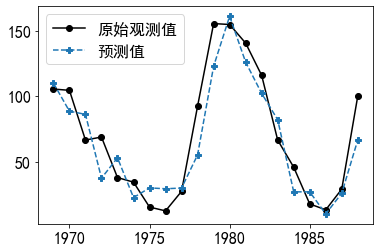

289    140.889482
dtype: float64


In [8]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



plt.rc('font',family='SimHei'); plt.rc('font',size=16)
d=pd.read_csv('./数据集/sunspots.csv',usecols=['counts'])
md=sm.tsa.arima.ARIMA(d,order=(9,0,1)).fit()
years=np.arange(1700,1989)  #已知观测值的年代
dhat=md.predict()
plt.plot(years[-20:],d.values[-20:],'o-k')
plt.plot(years[-20:],dhat.values[-20:],'P--')
plt.legend(('原始观测值','预测值')); plt.show()
dnext=md.predict(d.shape[0],d.shape[0])
print(dnext)  #显示下一期的预测值

d:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[1, 1, 2534.4152973148502, 2549.0810040673]
[1, 2, 2486.36252308045, 2504.6946565210123]
[1, 3, 2481.646979063845, 2503.645539192519]
[1, 4, 2501.8107743912437, 2527.4757612080307]
[1, 5, 2478.462260499293, 2507.7936740041923]
[2, 1, 2451.5373784871363, 2469.8695119276986]
[2, 2, 2452.426385372592, 2474.4249455012664]
[2, 3, 2454.39538232769, 2480.060369144477]
[2, 4, 2436.757559727367, 2466.0889732322667]
[2, 5, 2435.3898027120376, 2468.3876429050497]
[3, 1, 2450.7986554380886, 2472.797215566763]
[3, 2, 2452.786573271986, 2478.451560088773]


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3, 3, 2411.6547707565055, 2440.986184261405]
[3, 4, 2411.7421002572355, 2444.7399404502476]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3, 5, 2408.402974358737, 2445.0672412398612]
[4, 1, 2452.788049454614, 2478.453036271401]


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: 

[4, 2, 2451.5006218483704, 2480.83203535327]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4, 3, 2451.6335415969206, 2484.6313817899327]
[4, 4, 2410.7025759361513, 2447.3668428172755]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4, 5, 2410.2987384184967, 2450.6294319877334]
[5, 1, 2454.6752680832105, 2484.00668158811]


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: 

[5, 2, 2451.4100600964466, 2484.4079002894587]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5, 3, 2453.384336827295, 2490.0486037084193]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5, 4, 2411.0638811637496, 2451.3945747329863]


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[5, 5, 2412.309254190484, 2456.306374447833]
                               SARIMAX Results                                
Dep. Variable:                 counts   No. Observations:                  289
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1217.750
Date:                Sun, 14 Aug 2022   AIC                           2451.501
Time:                        08:50:44   BIC                           2480.832
Sample:                             0   HQIC                          2463.254
                                - 289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8290      4.107     11.888      0.000      40.779      56.879
ar.L1         -0.1270      0.086     -1.482      0.138      -0.295       0.041
ar.L2  

d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


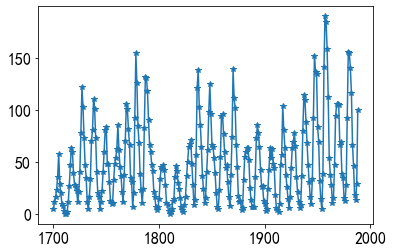

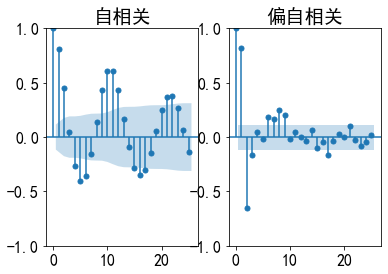

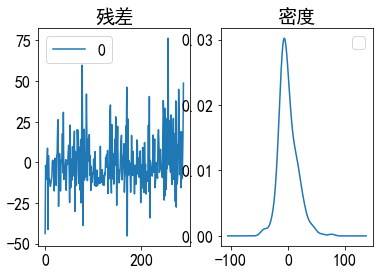

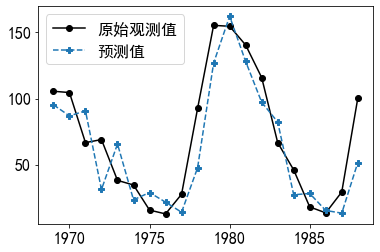

In [18]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




plt.rc('axes',unicode_minus=False)
plt.rc('font',family='SimHei'); plt.rc('font',size=16)
d=pd.read_csv('./数据集/sunspots.csv'); dd=d['counts']
years=d['year'].values.astype(int)
plt.plot(years,dd.values,'-*'); plt.figure()
ax1=plt.subplot(121); plot_acf(dd,ax=ax1,title='自相关')
ax2=plt.subplot(122); plot_pacf(dd,ax=ax2,title='偏自相关')

for i in range(1,6):
    for j in range(1,6):
        try:  # 存在部分报错，所以用try来跳过报错。
            md=sm.tsa.arima.ARIMA(dd,order=(i,0,j)).fit()
            print([i,j,md.aic,md.bic])
        except:
            pass

zmd=sm.tsa.arima.ARIMA(dd,order=(4,0,2)).fit()
print(zmd.summary())  #显示模型的所有信息

residuals = pd.DataFrame(zmd.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('') 

dhat=zmd.predict(); plt.figure()
plt.plot(years[-20:],dd.values[-20:],'o-k')
plt.plot(years[-20:],dhat.values[-20:],'P--')
plt.legend(('原始观测值','预测值'))
dnext=zmd.predict(d.shape[0],d.shape[0])
print(dnext)  #显示下一期的预测值
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.753
Date:                Sun, 14 Aug 2022   AIC                             -5.507
Time:                        09:58:44   BIC                             -1.303
Sample:                             0   HQIC                            -4.162
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4962      0.196      2.532      0.011       0.112       0.880
ar.L2          0.0485      0.215      0.225      0.822      -0.373       0.470
sigma2         0.0395      0.012      3.193      0.0

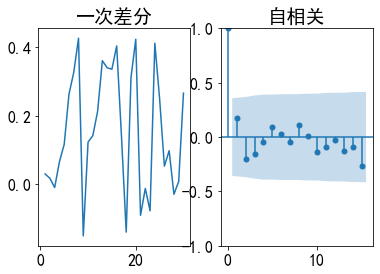

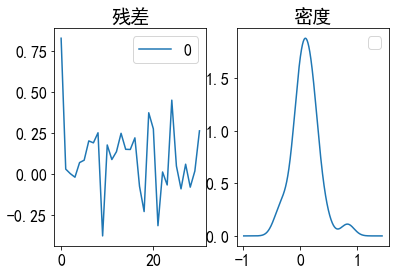

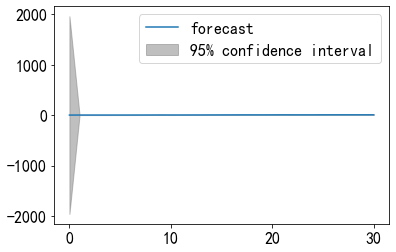

In [27]:

import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import pylab as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict



plt.rc('axes',unicode_minus=False)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
df=pd.read_csv('./数据集/austa.csv')
plt.subplot(121); plt.plot(df.value.diff())
plt.title('一次差分')
ax2=plt.subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2,title='自相关')

md=sm.tsa.arima.ARIMA(df.value, order=(2,1,0))
mdf=md.fit()
print(mdf.summary())

residuals = pd.DataFrame(mdf.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('')

plot_predict(mdf)  #原始数据与预测值对比图
plt.show()
